In [1]:
from google.colab import files
files.upload()  # Upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"suhnithaaienampudi","key":"1855aafe8129e1e14919ab50dcf8da81"}'}

In [2]:
import os
import zipfile

# Make a directory for kaggle and move json there
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/kaggle.json

# Set proper permissions
!chmod 600 /root/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d farzadnekouei/trash-type-image-dataset

Dataset URL: https://www.kaggle.com/datasets/farzadnekouei/trash-type-image-dataset
License(s): unknown
  0% 0.00/40.9M [00:00<?, ?B/s]
100% 40.9M/40.9M [00:00<00:00, 1.11GB/s]


In [4]:
import zipfile

with zipfile.ZipFile("trash-type-image-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("trash_dataset")

In [5]:
import zipfile

with zipfile.ZipFile("trash-type-image-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("trash_dataset")


In [11]:
import os
os.listdir("trash_dataset")


['TrashType_Image_Dataset']

Classes: ['glass', 'trash', 'metal', 'plastic', 'cardboard', 'paper']


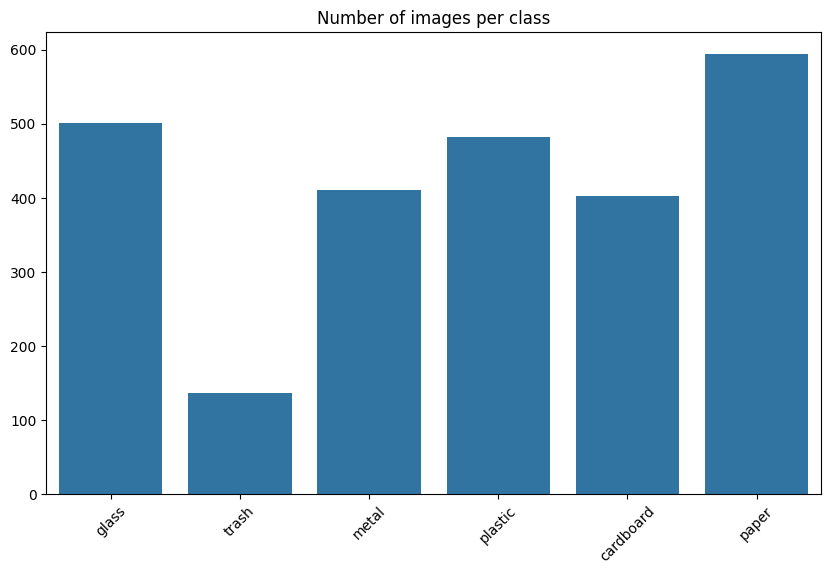

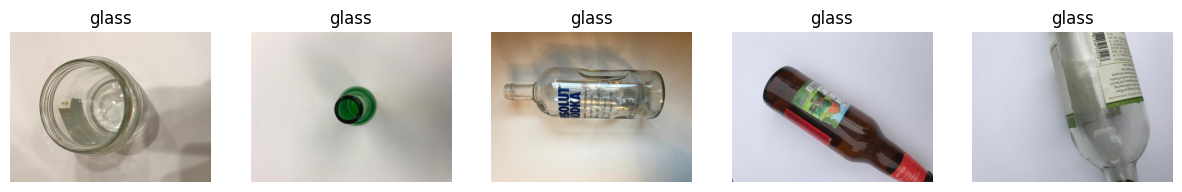

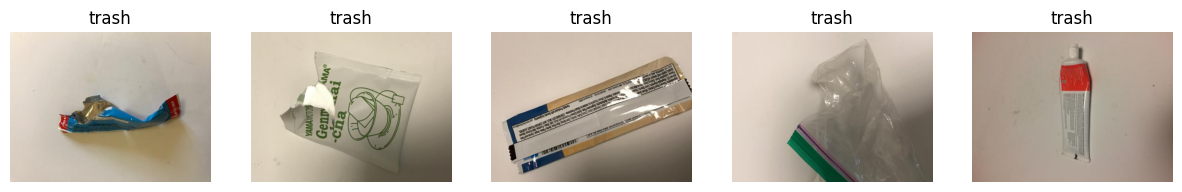

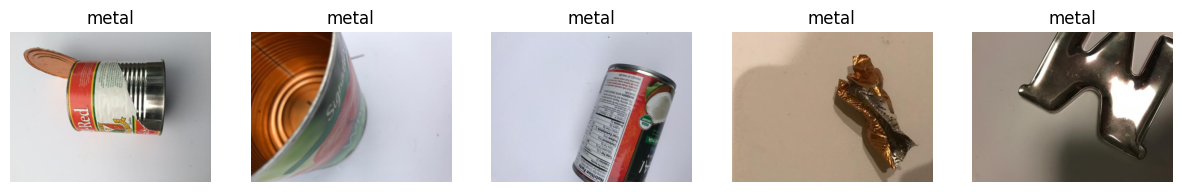

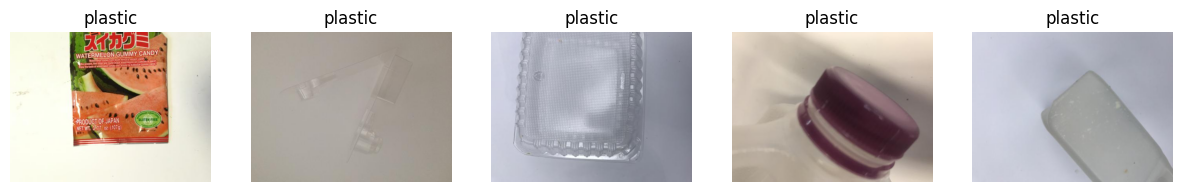

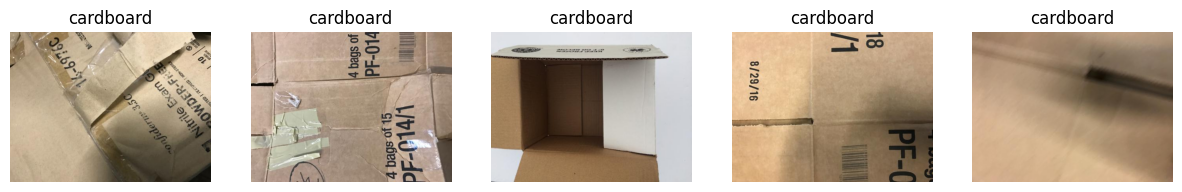

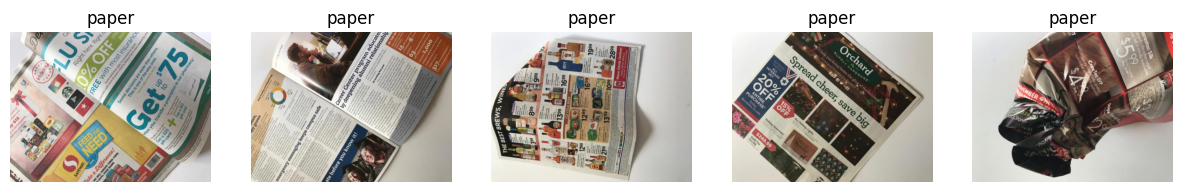

In [12]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Set dataset path
data_path = 'trash_dataset/TrashType_Image_Dataset'  # or modify as per extracted folder

# List of classes
classes = os.listdir(data_path)
print("Classes:", classes)

# Count images per class
class_counts = {cls: len(os.listdir(os.path.join(data_path, cls))) for cls in classes}

# Plot class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Number of images per class")
plt.xticks(rotation=45)
plt.show()

# Show sample images
def show_samples(data_path, class_name, num=5):
    images = os.listdir(os.path.join(data_path, class_name))[:num]
    plt.figure(figsize=(15, 3))
    for i, img_name in enumerate(images):
        img_path = os.path.join(data_path, class_name, img_name)
        img = Image.open(img_path)
        plt.subplot(1, num, i + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.show()

# Show samples for each class
for cls in classes:
    show_samples(data_path, cls)


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
BATCH_SIZE = 32

# Create training and validation generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range=20
)

train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [14]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Load pre-trained MobileNetV2 without top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Freeze base model

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(len(classes), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=outputs)

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4021 - loss: 1.5805

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.4039 - loss: 1.5759 - val_accuracy: 0.6998 - val_loss: 0.8122
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.6979 - loss: 0.8087 - val_accuracy: 0.7356 - val_loss: 0.7285
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.7270 - loss: 0.6902 - val_accuracy: 0.7455 - val_loss: 0.6934
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.7777 - loss: 0.5797 - val_accuracy: 0.7575 - val_loss: 0.6692
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.8059 - loss: 0.5437 - val_accuracy: 0.7634 - val_loss: 0.6338
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.8065 - loss: 0.5151 - val_accuracy: 0.7753 - val_loss: 0.6100
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.8118 - loss: 0.4993 - val_accuracy: 0.7873 - val_loss: 0.6231
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.8297 - loss: 0.4542 - val_accuracy: 0.7734 - val_loss: 0.

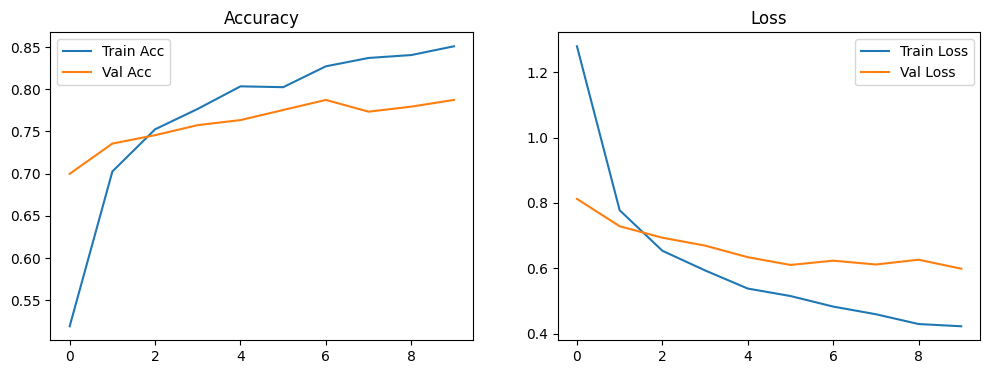

In [15]:
# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()
